In [1]:
import sys
from datetime import datetime
import pickle
import pandas as pd
from KEMCE.dataset.data_labelling import LabelsForData
from KEMCE.utils import ConceptEvaluation
from random import sample 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import torch

In [2]:
data_path = '../outputs/kame/'
# torch.save(model, model_path)
# kame_model_file = data_path + 'model/ccs_single_level/mimic.kame_2020-09-11_14-15-27.model'
# kame_model_file = data_path + 'model/ccs_single_level/mimic.kame_100_2020-09-11_20-00-58.model'
kame_model_file = data_path + 'model/ccs_single_level/mimic.kame_epoch(99)_2020-09-11_20-00-58.model'

dict_file = data_path + 'data/mimic.types'
level2_file = data_path + 'data/mimic.level2.pk'
seqs_file = data_path + 'data/mimic.seqs'

In [3]:
dict_mimic = pickle.load(open(dict_file, 'rb'))
dict_mimic_inverse = {v:k for k, v in dict_mimic.items()}

In [4]:
kame_model = torch.load(kame_model_file)

In [5]:
kame_model

KAME(
  (linear): Linear(in_features=100, out_features=100, bias=True)
  (fc): Linear(in_features=200, out_features=272, bias=True)
  (embed_init): Embedding(5548, 100)
  (dag_attention): DAGAttention(
    (linear1): Linear(in_features=200, out_features=100, bias=True)
    (linear2): Linear(in_features=100, out_features=1, bias=True)
  )
  (gru): GRU(100, 100, num_layers=2, batch_first=True, dropout=0.2)
  (embed_a): Embedding(669, 100)
)

In [6]:
sigle_dx_file = '../ccs/ccs_single_dx_tool_2015.csv'
multi_dx_file = '../ccs/ccs_multi_dx_tool_2015.csv'
label4data = LabelsForData(multi_dx_file, sigle_dx_file)

In [7]:
eval = ConceptEvaluation(dict_mimic_inverse, label4data)

In [8]:
x_2d, labels = eval.get_sample_tsne(kame_model.dag_emb.cpu().detach().numpy(), 2000)

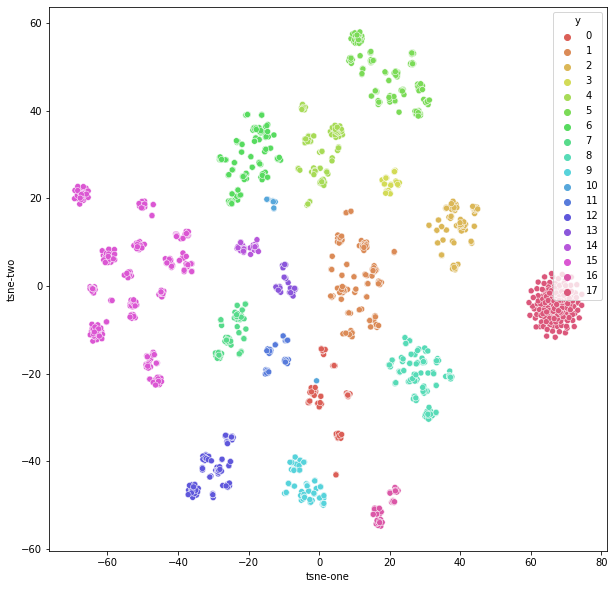

In [9]:
cms_df_subset={}
cms_df_subset['tsne-one'] = x_2d[:,0]
cms_df_subset['tsne-two'] = x_2d[:,1]
cms_df_subset['y'] = np.array(labels)
plt.figure(figsize=(10,10))
# ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 18),
    data=cms_df_subset,
#     legend="full",
    alpha=1,
#     ax=ax1
)

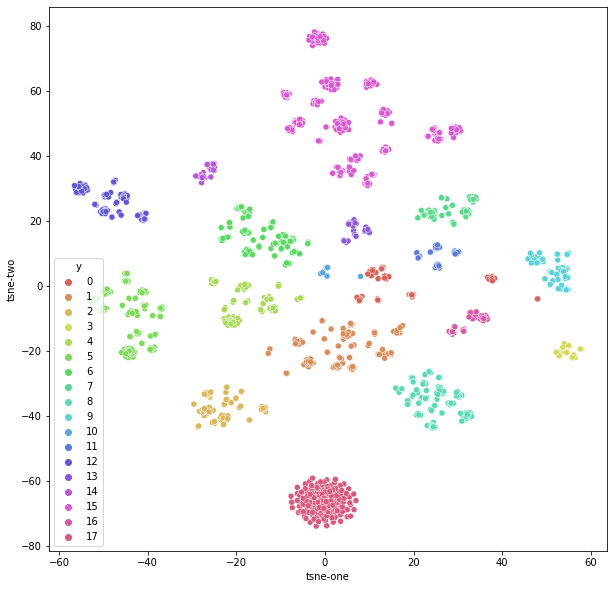

In [9]:
cms_df_subset={}
cms_df_subset['tsne-one'] = x_2d[:,0]
cms_df_subset['tsne-two'] = x_2d[:,1]
cms_df_subset['y'] = np.array(labels)
plt.figure(figsize=(10,10))
# ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 18),
    data=cms_df_subset,
#     legend="full",
    alpha=1,
#     ax=ax1
)

In [10]:
admLabelMap = {}  # admissionID: [mortality, los]
for index, row in adm.iterrows():
#     print(row.HADM_ID, row.ADMITTIME, row.DISCHTIME,row.HOSPITAL_EXPIRE_FLAG )
    admId = int(row.HADM_ID)
    admTime = datetime.strptime(row.ADMITTIME, '%Y-%m-%d %H:%M:%S')
    sepTime = datetime.strptime(row.DISCHTIME, '%Y-%m-%d %H:%M:%S')
    mortality = int(row.HOSPITAL_EXPIRE_FLAG)
    interval = (sepTime - admTime).days + 1
    los = 0 if interval <= 7 else 1
    
    admLabelMap[admId] = [mortality, los]
    
#     print(admId, admTime, sepTime,mortality )
    if index > 10: break

NameError: name 'adm' is not defined

In [ ]:

ml_out_file = 'outputs/kemce/data/mortality_los/'

visits = pickle.load(open(ml_out_file+'mimic.visits', 'rb'))
labels = pickle.load(open(ml_out_file+'mimic.labels', 'rb'))

In [ ]:
rd_out_file = 'outputs/kemce/data/readmission_diagnosis/'
seqs = pickle.load(open(rd_out_file+'mimic.inputs_all.seqs', 'rb'))
labels_seqs = pickle.load(open(rd_out_file+'mimic.labels_all.label', 'rb'))
dict_3digit = pickle.load(open(rd_out_file+'mimic.3digitICD9.dict', 'rb'))
dict_ccs = pickle.load(open(rd_out_file+'mimic.ccs_single_level.dict', 'rb'))

In [ ]:
print(len(seqs))
more_ten = 0
for seq in seqs:
    if len(seq.split('[SEP]')) > 10:
        more_ten += 1
more_ten    

In [ ]:
labels_seqs[2]

In [ ]:
input = seqs[ind].split()
ln = len(input)

In [ ]:
input[ln-11:]

In [ ]:
seps = input.split('[SEP]')
sep_types = []
for i, sep in enumerate(seps):
    if sep != '':
        length = len(sep.split())
        sep_types = sep_types + [i] * (length + 1)

In [ ]:
len(sep_types), sep_types

In [ ]:
ls = input.split()

In [ ]:
import numpy as np
max_x_len = 100
token_type_pad = []
for x in seqs[ind:5]:
    tokens = ' '.join(x.split())
    seps = tokens.split('[SEP]')
    sep_types = []
    for i, sep in enumerate(seps):
        if sep != '':
            length = len(sep.split())
            sep_types = sep_types + [i] * (length + 1)
    if len(sep_types) < max_x_len:
        sep_types = sep_types + [sep_types[-1]] * (max_x_len - len(sep_types))
    token_type_pad.append(np.array(sep_types))
token_type = np.stack(token_type_pad)

In [ ]:
labels_seqs[0][1]

In [ ]:
labels = np.zeros(20, dtype=np.float32)

In [ ]:
labels[labels_seqs[0][1]] = 1.0

In [ ]:
labels

In [ ]:
visits[0].replace('[CLS]', '[UNK]').replace('[SEP]', '[UNK]'), labels[0]

In [ ]:
def convert_to_icd9(dxStr):
    if dxStr.startswith('E'):
        if len(dxStr) > 4: return dxStr[:4] + '.' + dxStr[4:]
        else: return dxStr
    else:
        if len(dxStr) > 3: return dxStr[:3] + '.' + dxStr[3:]
        else: return dxStr
    
def convert_to_3digit_icd9(dxStr):
    if dxStr.startswith('E'):
        if len(dxStr) > 4: return dxStr[:4]
        else: return dxStr
    else:
        if len(dxStr) > 3: return dxStr[:3]
        else: return dxStr
        
def time_spans(interval):
    sep = '[SEP'
    if interval <= 30:
        sep += '1M]'
    elif 30<interval<=90 :
        sep += '3M]'
        
    elif 90<interval<=180 :
        sep += '6M]'
    elif 180<interval<=365 :
        sep += '12M]'
    else:
         sep += '12M+]'
    return sep

In [ ]:
print('Building pid-admission mapping, admission-date mapping')
pidAdmMap = {}
admDateMap = {}
infd = open(admissionFile, 'r')
infd.readline()
for line in infd:
    tokens = line.strip().split(',')
    pid = int(tokens[1])
    admId = int(tokens[2])
    admTime = datetime.strptime(tokens[3], '%Y-%m-%d %H:%M:%S')
    admDateMap[admId] = admTime
    if pid in pidAdmMap: pidAdmMap[pid].append(admId)
    else: pidAdmMap[pid] = [admId]
infd.close()


In [ ]:
print('Building admission-dxList mapping')
admDxMap = {}
admDxMap_3digit = {}
infd = open(diagnosisFile, 'r')
infd.readline()
for line in infd:
    tokens = line.strip().split(',')
    admId = int(tokens[2])
    dx = tokens[4][1:-1]
    if len(dx) == 0:
#         print('code without length: ', line)
        continue

    dxStr = 'D_' + convert_to_icd9(dx) ############## Uncomment this line and comment the line below, if you want to use the entire ICD9 digits.
    dxStr_3digit = 'D_' + convert_to_3digit_icd9(dx)

    if admId in admDxMap:
        admDxMap[admId].append(dxStr)
    else:
        admDxMap[admId] = [dxStr]

    if admId in admDxMap_3digit:
        admDxMap_3digit[admId].append(dxStr_3digit)
    else:
        admDxMap_3digit[admId] = [dxStr_3digit]
infd.close()

In [ ]:
print('Building pid-sortedVisits mapping')
pidSeqMap = {}
pidSeqMap_3digit = {}
for pid, admIdList in pidAdmMap.items():
    new_admIdList = []
    for admId in admIdList:
        if admId in admDxMap:
            new_admIdList.append(admId)
    if len(new_admIdList) < 2: continue
    # print(admIdList)
    sortedList = sorted([(admDateMap[admId], admDxMap[admId]) for admId in new_admIdList])
    pidSeqMap[pid] = sortedList

    sortedList_3digit = sorted([(admDateMap[admId], admDxMap_3digit[admId]) for admId in new_admIdList])
    pidSeqMap_3digit[pid] = sortedList_3digit

In [ ]:
len(pidSeqMap)

In [ ]:
print('Building pids, dates, strSeqs')
pids = []
seqs = []
seqs_ent = []
vocab_set = {}
for pid, visits in pidSeqMap.items():
    pids.append(pid)
    first_time = visits[0][0]
    sep_str = ''
    ent_str = ''
    for i, visit in enumerate(visits):
        current_time = visit[0]
        interval = (current_time - first_time).days
        first_time = current_time
        if i > 0:
            sep = '[SEP] ' + time_spans(interval)
        else:
            sep = '[CLS]'
        visit_set = set(visit[1])
        sep_str += sep + ' ' + ' '.join(visit_set) + ' '
        ent_str += '[UNK] ' + ' '.join(visit_set) + ' '
        for code in visit_set:
            if code in vocab_set:
                vocab_set[code] += 1
            else:
                vocab_set[code] = 1
    sep_str = sep_str[:-1]
    ent_str = ent_str[:-1]
    seqs.append(sep_str)
    seqs_ent.append(ent_str)

In [ ]:
sorted_vocab = {k: v for k, v in sorted(vacab_set.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
ent_str

In [ ]:
import collections
len(collections.OrderedDict())

In [ ]:
print('Building pids, dates, strSeqs for 3digit ICD9 code')
seqs_3digit = []
for pid, visits in pidSeqMap_3digit.items():
    seq = []
    for visit in visits:
        seq.append(visit[1])
    seqs_3digit.append(seq)

print('Converting strSeqs to intSeqs, and making types for 3digit ICD9 code')
types_3digit = {}
newSeqs_3digit = []
for patient in seqs_3digit:
    newPatient = []
    for visit in patient:
        newVisit = []
        for code in set(visit):
            if code in types_3digit:
                newVisit.append(types_3digit[code])
            else:
                types_3digit[code] = len(types_3digit)
                newVisit.append(types_3digit[code])
        newPatient.append(newVisit)
    newSeqs_3digit.append(newPatient)

In [ ]:
pickle.dump(pids, open(outFile+'.pids', 'wb'), -1)
pickle.dump(dates, open(outFile+'.dates', 'wb'), -1)
pickle.dump(newSeqs, open(outFile+'.seqs', 'wb'), -1)
pickle.dump(types, open(outFile+'.types', 'wb'), -1)
pickle.dump(newSeqs_3digit, open(outFile+'.3digitICD9.seqs', 'wb'), -1)
pickle.dump(types_3digit, open(outFile+'.3digitICD9.types', 'wb'), -1)

In [ ]:
len(newSeqs),len(types)